In [62]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [63]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [64]:
X_test.shape

(10000, 32, 32, 3)

In [65]:
y_train.shape

(50000, 1)

In [66]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [67]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [68]:
y_test = y_test.reshape(-1,)

In [69]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [70]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

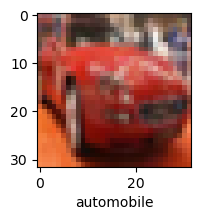

In [71]:
plot_sample(X_train, y_train, 5)

In [72]:
X_train=X_train/255.0
X_test=X_test/255.0

In [73]:
cnn = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32,3)),
    layers.MaxPooling2D((3, 3)),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((3, 3)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [74]:
cnn.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [75]:
measures=cnn.fit(X_train, y_train, epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1563/1563 [==============================] - 19s 12ms/step - loss: 1.5739 - accuracy: 0.4340 - val_loss: 1.3115 - val_accuracy: 0.5346
Epoch 2/5
1563/1563 [==============================] - 18s 11ms/step - loss: 1.1997 - accuracy: 0.5800 - val_loss: 1.1618 - val_accuracy: 0.5935
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.0519 - accuracy: 0.6367 - val_loss: 1.2613 - val_accuracy: 0.5720
Epoch 4/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9528 - accuracy: 0.6686 - val_loss: 1.0810 - val_accuracy: 0.6247
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 0.8791 - accuracy: 0.6946 - val_loss: 1.1622 - val_accuracy: 0.6219


In [76]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.1622 - accuracy: 0.6219


[1.1621510982513428, 0.6219000220298767]

In [77]:
from sklearn.metrics import confusion_matrix , classification_report

y_pred = cnn.predict(X_train)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report of Training: \n", classification_report(y_train, y_pred_classes))

1563/1563 [==============================] - 7s 4ms/step
Classification Report of Training: 
               precision    recall  f1-score   support

           0       0.82      0.51      0.63      5000
           1       0.69      0.87      0.77      5000
           2       0.89      0.27      0.41      5000
           3       0.51      0.62      0.56      5000
           4       0.60      0.72      0.66      5000
           5       0.82      0.44      0.57      5000
           6       0.83      0.69      0.76      5000
           7       0.74      0.76      0.75      5000
           8       0.51      0.93      0.66      5000
           9       0.68      0.78      0.72      5000

    accuracy                           0.66     50000
   macro avg       0.71      0.66      0.65     50000
weighted avg       0.71      0.66      0.65     50000



In [78]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report of Testing: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 2s 5ms/step
Classification Report of Testing: 
               precision    recall  f1-score   support

           0       0.80      0.49      0.61      1000
           1       0.67      0.84      0.74      1000
           2       0.85      0.25      0.38      1000
           3       0.46      0.55      0.50      1000
           4       0.57      0.69      0.62      1000
           5       0.73      0.41      0.53      1000
           6       0.80      0.65      0.72      1000
           7       0.69      0.70      0.69      1000
           8       0.49      0.91      0.63      1000
           9       0.63      0.73      0.68      1000

    accuracy                           0.62     10000
   macro avg       0.67      0.62      0.61     10000
weighted avg       0.67      0.62      0.61     10000



In [79]:
y_pred[:4]

array([[1.44729847e-02, 1.18355714e-01, 1.52112450e-03, 1.71044588e-01,
        1.01232762e-03, 5.64466557e-03, 1.19141685e-02, 4.12969012e-03,
        6.22264862e-01, 4.96398658e-02],
       [5.70063596e-04, 1.29521549e-01, 5.71271137e-08, 1.68806153e-07,
        7.12365633e-09, 7.15984605e-10, 1.57687141e-09, 1.48483341e-08,
        8.60865176e-01, 9.04284697e-03],
       [1.48916561e-02, 2.30922222e-01, 6.88608343e-05, 1.74247456e-04,
        5.06445613e-05, 6.42991563e-06, 8.80472726e-06, 3.32416239e-05,
        4.79664683e-01, 2.74179310e-01],
       [1.11990586e-01, 1.54652037e-02, 4.98857349e-04, 2.69789336e-04,
        1.28307001e-04, 5.32174909e-06, 4.14319329e-05, 5.53727805e-05,
        8.65572035e-01, 5.97316958e-03]], dtype=float32)

In [88]:
y_pred_classes[:4]

[8, 8, 8, 8]

In [89]:
y_test[:4]

array([3, 8, 8, 0], dtype=uint8)

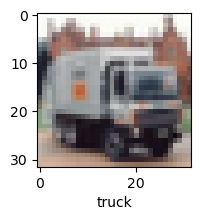

In [82]:
plot_sample(X_test, y_test,11)

In [83]:
classes[y_pred_classes[11]]

'truck'

In [84]:
cnn.save("newmodel.h5")

d:\New folder\envs\ds_env\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [85]:
import tensorflow as tf
from PIL import Image
import numpy as np

model = tf.keras.models.load_model('./newmodel.h5')

image_path = './c1.jpeg'
image = Image.open(image_path)
image = image.resize((32, 32))  
image = np.array(image) / 255.0  
image = np.expand_dims(image, axis=0)  

predictions = model.predict(image)
print(predictions)
predicted_class = np.argmax(predictions)
print("Predicted class:", predicted_class,classes[predicted_class])



1/1 [==============================] - 0s 64ms/step
[[1.0831574e-03 6.3583175e-06 5.3892229e-03 9.4089621e-01 1.5624972e-02
  1.9960394e-02 4.1933553e-03 1.2746080e-02 7.8459481e-05 2.1835045e-05]]
Predicted class: 3 cat


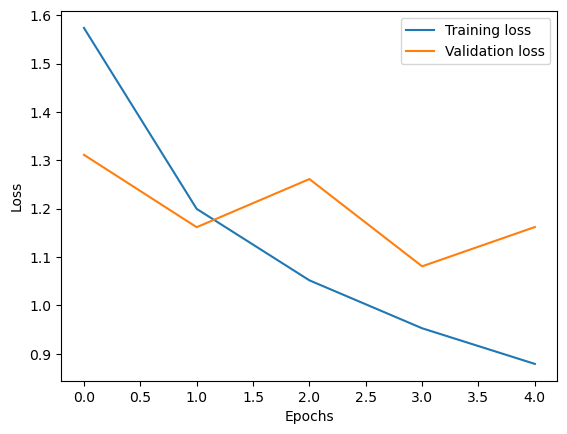

In [86]:
plt.plot(measures.history['loss'],label="Training loss")
plt.plot(measures.history['val_loss'],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

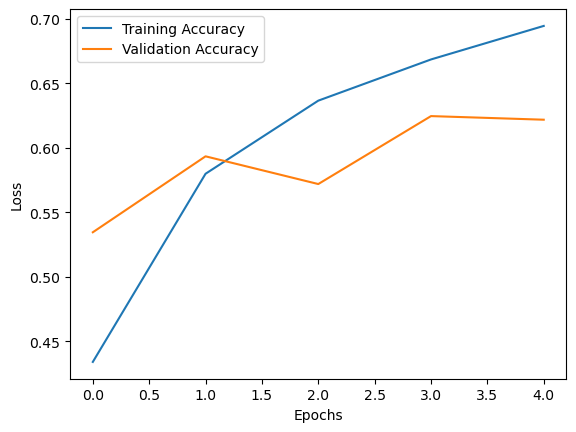

In [87]:
plt.plot(measures.history['accuracy'],label='Training Accuracy')
plt.plot(measures.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()